In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
gdp_pcap = pd.read_csv("gdp_pcap.csv", index_col="country")

# drop all years in the future
gdp_pcap.drop(columns=gdp_pcap.columns[gdp_pcap.columns.astype(int) > 2025], inplace=True)

gdp_pcap.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,481,481,481,481,481,481,481,481,481,481,...,2100,2100,2060,2080,1970,1520,1390,1360,1330,1330
Angola,373,374,376,378,379,381,383,385,386,388,...,7490,7220,6880,6600,6030,5910,5910,5780,5750,5760
Albania,469,471,472,473,475,476,477,479,480,482,...,12.3k,12.8k,13.3k,13.7k,13.3k,14.6k,15.5k,16.2k,16.8k,17.4k
Andorra,1370,1370,1370,1380,1380,1380,1390,1390,1390,1390,...,57.5k,56.4k,56.2k,56.3k,49.7k,52.8k,56.4k,55.3k,55.2k,55k
UAE,1140,1150,1150,1150,1160,1160,1170,1170,1180,1180,...,70.9k,70.9k,71.2k,71.5k,67.4k,69.7k,74.6k,76.5k,78.6k,81.3k


In [3]:
lex = pd.read_csv("lex.csv", index_col="country")

# drop all years in the future
lex.drop(columns=lex.columns[lex.columns.astype(int) > 2025], inplace=True)

lex.head()

,1800,1801,1802,1803,1804,1805,1806,1807,1808,1809,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,28.1,...,62.0,62.9,62.7,63.3,62.3,61.8,62.6,64.0,64.8,65.1
Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,63.9,64.2,64.6,65.1,64.9,64.2,64.5,65.9,66.1,66.3
Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,78.2,78.3,78.4,78.5,76.2,75.7,76.1,77.3,79.5,79.7
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,82.1,82.1,82.1,82.2,78.3,79.6,82.7,82.9,83.0,83.2
UAE,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,...,73.4,73.5,73.7,73.9,73.2,73.0,73.4,74.6,74.8,74.9


In [4]:
regions = pd.read_csv("regions.csv")

# only keep relevant cols
regions = regions[["name", "four_regions"]].copy()

# set index
regions.set_index("name", inplace=True)

regions.head()

,four_regions
name,
Australia,asia
Brunei,asia
Cambodia,asia
China,asia
Fiji,asia


In [5]:
# add region col
gdp_pcap = gdp_pcap.join(regions.rename(columns={'four_regions': 'region'}))
lex = lex.join(regions.rename(columns={'four_regions': 'region'}))

In [11]:
# sort by region and country
gdp_by_region = gdp_pcap.sort_values(['region', 'country'])
lex = lex.sort_values(['region', 'country'])

Text(0, 0.5, 'Life exp (2020)')

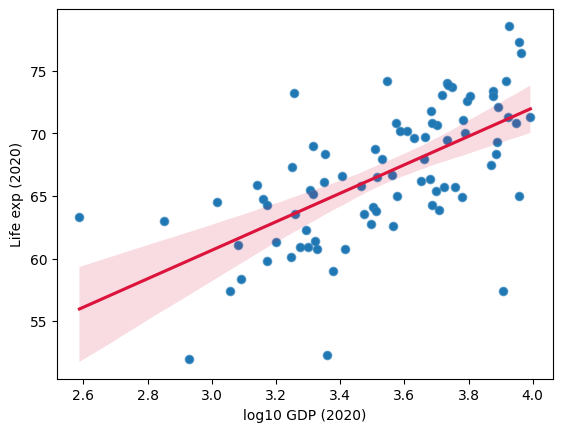

In [14]:
year = 2020
g = pd.to_numeric(gdp_pcap[str(year)], errors='coerce')
l = pd.to_numeric(lex[str(year)], errors='coerce')

df = pd.DataFrame({'gdp': g, 'lex': l}).dropna()
sns.scatterplot(data=df, x=np.log10(df['gdp']), y='lex')
sns.regplot(data=df, x=np.log10(df['gdp']), y='lex', scatter_kws={'alpha':0.6}, line_kws={'color':'crimson'})
plt.xlabel(f'log10 GDP ({year})'); plt.ylabel(f'Life exp ({year})')